## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv") 
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
68769,ZWE,Africa,Zimbabwe,2021-02-09,34781.0,123.0,138.143,1353.0,14.0,14.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68770,ZWE,Africa,Zimbabwe,2021-02-10,34864.0,83.0,128.571,1364.0,11.0,13.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68771,ZWE,Africa,Zimbabwe,2021-02-11,34864.0,0.0,99.000,1364.0,0.0,10.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68772,ZWE,Africa,Zimbabwe,2021-02-12,35045.0,181.0,102.000,1393.0,29.0,12.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68773,ZWE,Africa,Zimbabwe,2021-02-13,35104.0,59.0,88.143,1398.0,5.0,11.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
# Paises que empiezan por Z
df_Z = df[df['location'].str.startswith('Z')]
df_Z

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
68110,ZMB,Africa,Zambia,2020-03-18,2.0,2.0,NaN,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
68111,ZMB,Africa,Zambia,2020-03-19,2.0,0.0,NaN,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
68112,ZMB,Africa,Zambia,2020-03-20,2.0,0.0,NaN,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
68113,ZMB,Africa,Zambia,2020-03-21,2.0,0.0,NaN,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
68114,ZMB,Africa,Zambia,2020-03-22,3.0,1.0,NaN,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,ZWE,Africa,Zimbabwe,2021-02-09,34781.0,123.0,138.143,1353.0,14.0,14.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68770,ZWE,Africa,Zimbabwe,2021-02-10,34864.0,83.0,128.571,1364.0,11.0,13.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68771,ZWE,Africa,Zimbabwe,2021-02-11,34864.0,0.0,99.000,1364.0,0.0,10.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68772,ZWE,Africa,Zimbabwe,2021-02-12,35045.0,181.0,102.000,1393.0,29.0,12.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [5]:
# Agrupo los países y cojo el número más alto de total deaths
df_Z.groupby(['location'], sort=False)['total_deaths'].max()

location
Zambia       940.0
Zimbabwe    1398.0
Name: total_deaths, dtype: float64

In [6]:
# Agrupo los países, cojo el número más alto de total deaths, ordenos los países de mayor a menor número de muertes y cojo los 26 primeros, ya que los 6 primeros son números generales de World, Europe, North America...
df.groupby(['location'])['total_deaths'].max().sort_values(ascending=False).head(26)

location
World             2393751.0
Europe             764873.0
North America      703950.0
European Union     511620.0
United States      484248.0
South America      440345.0
Asia               385441.0
Brazil             238532.0
Mexico             173771.0
India              155642.0
United Kingdom     117128.0
Africa              98182.0
Italy               93356.0
France              80955.0
Russia              78403.0
Germany             64990.0
Spain               64747.0
Iran                58883.0
Colombia            57425.0
Argentina           50188.0
South Africa        47821.0
Peru                43255.0
Poland              40709.0
Indonesia           32936.0
Turkey              27377.0
Ukraine             25578.0
Name: total_deaths, dtype: float64

In [7]:
df_Spain = df[df['location'].str.startswith('Spain')]
df_Spain

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
58051,ESP,Europe,Spain,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
58052,ESP,Europe,Spain,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
58053,ESP,Europe,Spain,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
58054,ESP,Europe,Spain,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
58055,ESP,Europe,Spain,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58425,ESP,Europe,Spain,2021-02-09,3005487.0,16402.0,21945.429,63061.0,766.0,465.143,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
58426,ESP,Europe,Spain,2021-02-10,3023601.0,18114.0,20019.429,63704.0,643.0,476.286,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
58427,ESP,Europe,Spain,2021-02-11,3041454.0,17853.0,18289.857,64217.0,513.0,487.857,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
58428,ESP,Europe,Spain,2021-02-12,3056035.0,14581.0,16292.143,64747.0,530.0,480.143,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904


In [8]:
df_Spain = df_Spain[["date", "total_cases", "new_cases", "total_deaths", "new_deaths", "population"]]
df_Spain

,date,total_cases,new_cases,total_deaths,new_deaths,population
58051,2020-02-01,1.0,1.0,NaN,NaN,46754783.0
58052,2020-02-02,1.0,0.0,NaN,NaN,46754783.0
58053,2020-02-03,1.0,0.0,NaN,NaN,46754783.0
58054,2020-02-04,1.0,0.0,NaN,NaN,46754783.0
58055,2020-02-05,1.0,0.0,NaN,NaN,46754783.0
...,...,...,...,...,...,...
58425,2021-02-09,3005487.0,16402.0,63061.0,766.0,46754783.0
58426,2021-02-10,3023601.0,18114.0,63704.0,643.0,46754783.0
58427,2021-02-11,3041454.0,17853.0,64217.0,513.0,46754783.0
58428,2021-02-12,3056035.0,14581.0,64747.0,530.0,46754783.0


In [9]:
df_Spain = df_Spain.set_index('date')
df_Spain

,total_cases,new_cases,total_deaths,new_deaths,population
date,,,,,
2020-02-01,1.0,1.0,NaN,NaN,46754783.0
2020-02-02,1.0,0.0,NaN,NaN,46754783.0
2020-02-03,1.0,0.0,NaN,NaN,46754783.0
2020-02-04,1.0,0.0,NaN,NaN,46754783.0
2020-02-05,1.0,0.0,NaN,NaN,46754783.0
...,...,...,...,...,...
2021-02-09,3005487.0,16402.0,63061.0,766.0,46754783.0
2021-02-10,3023601.0,18114.0,63704.0,643.0,46754783.0
2021-02-11,3041454.0,17853.0,64217.0,513.0,46754783.0


### 1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

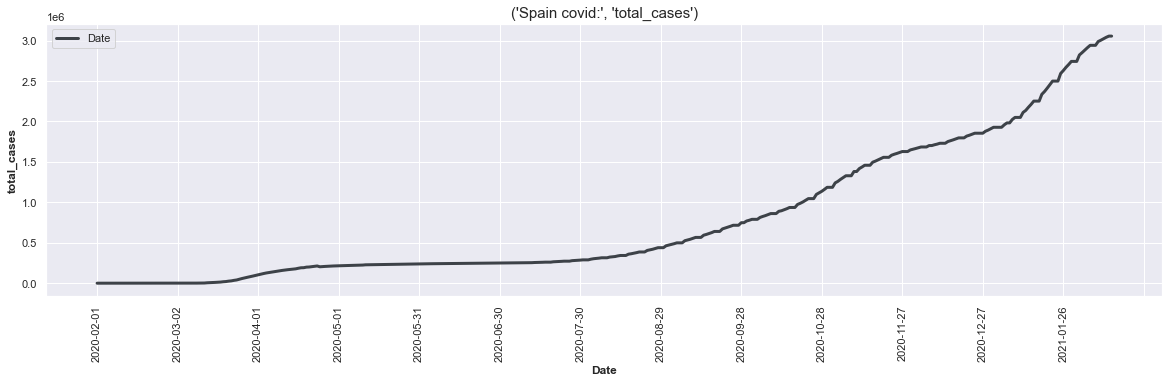

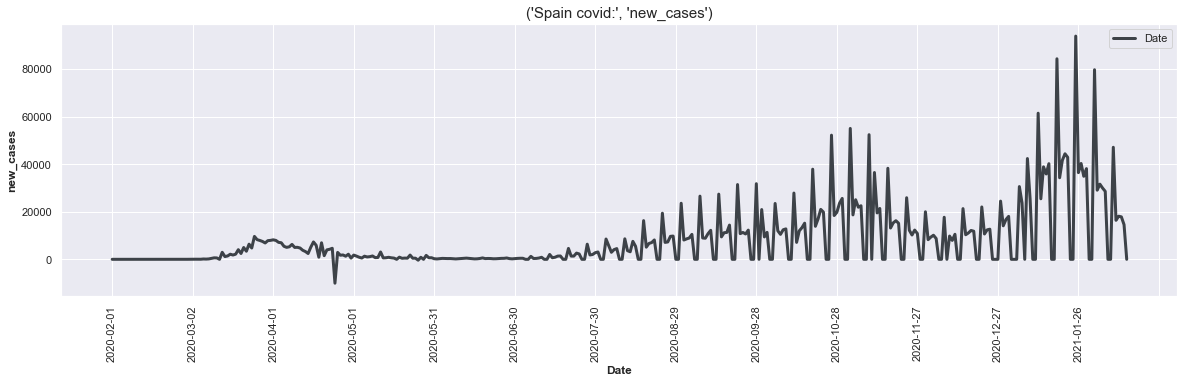

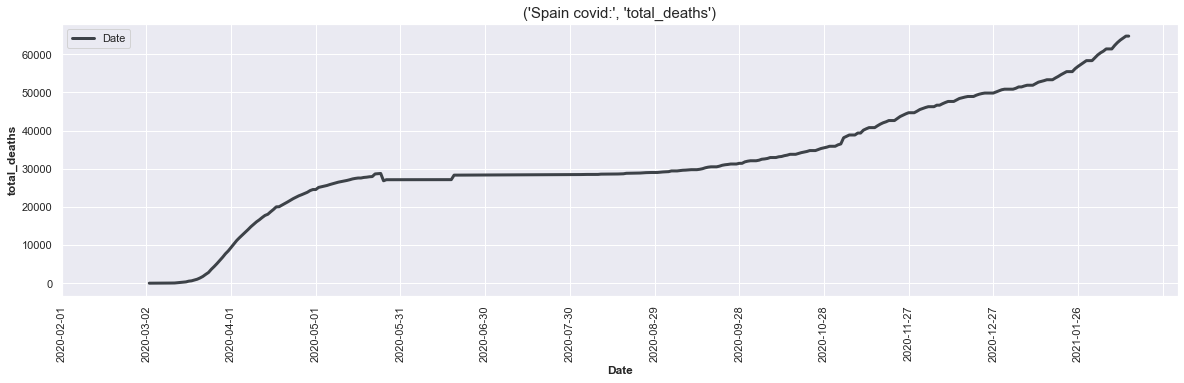

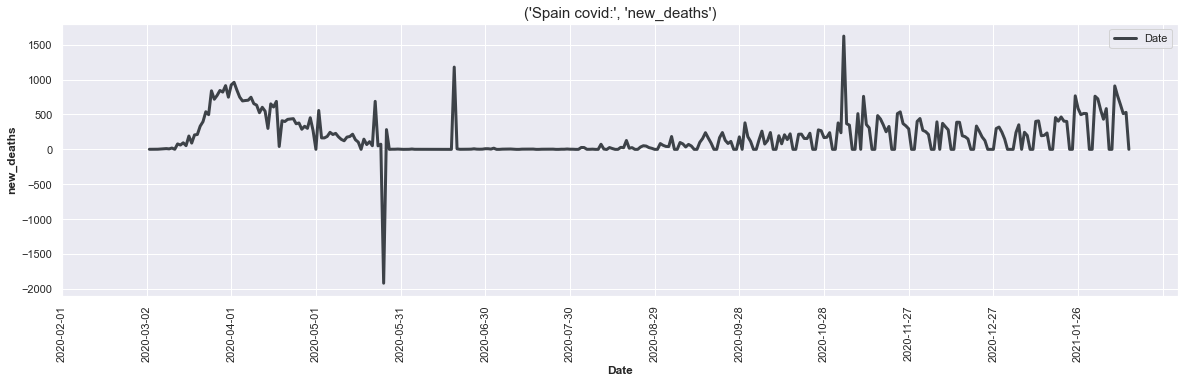

In [36]:
# Seaborn Visualization
sns.set()

# Creating the graph
list_column = ["total_cases", "new_cases", "total_deaths", "new_deaths"]

for column in list_column:
    plt.figure(figsize=(20, 5))
    plt.plot(df_Spain.index.values, df_Spain[column], color='#3d4248', linewidth= 3, label="Date")

    # Labels
    plt.xlabel("Date", weight="bold")
    plt.ylabel(column, weight="bold")
    plt.xticks(range(0, 400, 30), rotation="90")
    plt.title(label = ("Spain covid:", column), fontdict = {'fontsize':15})
    plt.legend()

    # Showing the graph
    plt.show


### 2. Elimina la columna "Población".

In [38]:
# df_Spain = df_Spain.drop('population', axis=1)
df_Spain

,total_cases,new_cases,total_deaths,new_deaths
date,,,,
2020-02-01,1.0,1.0,NaN,NaN
2020-02-02,1.0,0.0,NaN,NaN
2020-02-03,1.0,0.0,NaN,NaN
2020-02-04,1.0,0.0,NaN,NaN
2020-02-05,1.0,0.0,NaN,NaN
...,...,...,...,...
2021-02-09,3005487.0,16402.0,63061.0,766.0
2021-02-10,3023601.0,18114.0,63704.0,643.0
2021-02-11,3041454.0,17853.0,64217.0,513.0


### 3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?
